In [65]:
#Uploading significant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [66]:
#Uploading dataset 
df1 = pd.read_excel("Unemployment_Rate_upto_11_2020 (1).xlsx")
df2 = pd.read_excel("unemployment in India.xlsx")

In [67]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [68]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [70]:
# Unemployment Count
df1['Unemployed Count'] = (df1['Estimated Unemployment Rate (%)'] / 100) * df1['Estimated Employed']

# Labour Force
df1['Labour Force'] = df1['Estimated Employed'] / (1 - (df1['Estimated Unemployment Rate (%)'] / 100))

# Unemployment Gap
df1['Unemployment Gap'] = df1['Estimated Unemployment Rate (%)'] - (100 - df1['Estimated Labour Participation Rate (%)'])

# Employed Percentage
df1['Employed Percentage'] = (df1['Estimated Employed'] / df1['Labour Force']) * 100

# Region Unemployment Indicator
conditions = [
    (df1['Estimated Unemployment Rate (%)'] < 5),
    (df1['Estimated Unemployment Rate (%)'] >= 5) & (df1['Estimated Unemployment Rate (%)'] <= 10),
    (df1['Estimated Unemployment Rate (%)'] > 10)
]
values = ['Low', 'Medium', 'High']
df1['Unemployment Level'] = np.select(conditions, values)


In [71]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude,Unemployed Count,Labour Force,Unemployment Gap,Employed Percentage,Unemployment Level
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,9.116273e+05,1.760002e+07,-53.50,94.52,Medium
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,9.646115e+05,1.756998e+07,-53.27,94.17,Medium
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,9.195213e+05,1.685723e+07,-55.03,94.21,Medium
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,2.325200e+06,1.426206e+07,-46.39,79.49,High
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,2.263956e+06,1.573071e+07,-46.11,82.57,High


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [73]:
# Unemployment Count
df2['Unemployed Count'] = (df2['Estimated Unemployment Rate (%)'] / 100) * df2['Estimated Employed']

# Labour Force
df2['Labour Force'] = df2['Estimated Employed'] / (1 - (df2['Estimated Unemployment Rate (%)'] / 100))

# Unemployment Gap
df2['Unemployment Gap'] = df2['Estimated Unemployment Rate (%)'] - (100 - df2['Estimated Labour Participation Rate (%)'])

# Employed Percentage
df2['Employed Percentage'] = (df2['Estimated Employed'] / df2['Labour Force']) * 100

# Region Unemployment Indicator
conditions = [
    (df2['Estimated Unemployment Rate (%)'] < 5),
    (df2['Estimated Unemployment Rate (%)'] >= 5) & (df2['Estimated Unemployment Rate (%)'] <= 10),
    (df2['Estimated Unemployment Rate (%)'] > 10)
]
values = ['Low', 'Medium', 'High']
df2['Unemployment Level'] = np.select(conditions, values)


Data Preprocessing

Performing Analysis on dataframe 1

In [74]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude,Unemployed Count,Labour Force,Unemployment Gap,Employed Percentage
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,2.670000e+02,2.670000e+02,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,1.355825e+06,1.562494e+07,-46.081498,87.763071
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,1.602014e+06,1.461635e+07,12.876164,10.803283
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,2.130198e+03,2.203264e+05,-78.760000,24.150000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.541814e+05,3.410363e+06,-54.700000,83.245000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,8.038005e+05,1.063639e+07,-48.010000,90.350000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,1.862218e+06,2.386703e+07,-40.640000,95.155000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,1.096710e+07,6.489301e+07,15.150000,99.500000


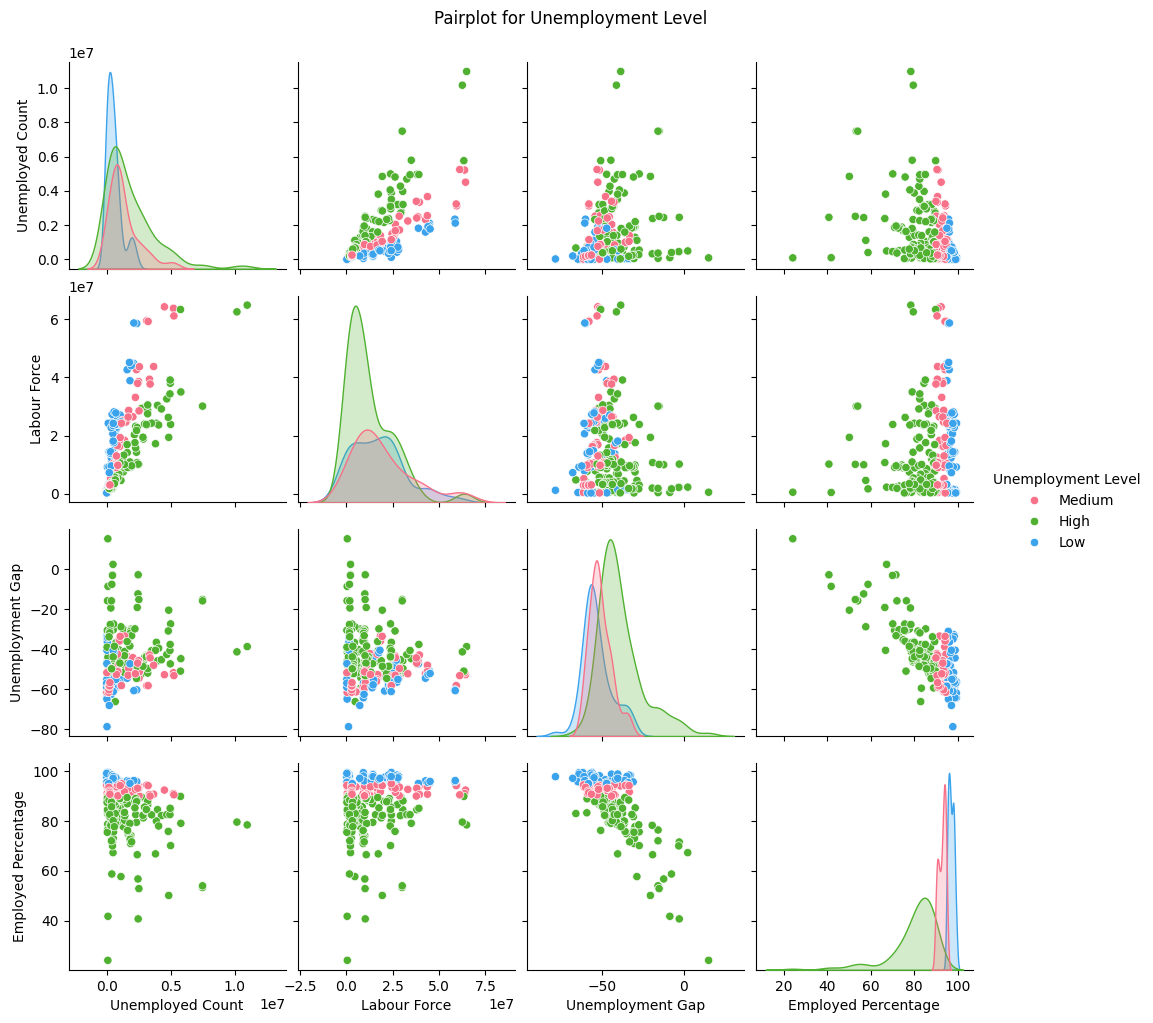

In [75]:
selected_columns = ['Unemployed Count', 'Labour Force', 'Unemployment Gap', 'Employed Percentage', 'Unemployment Level']
df1_selected = df1[selected_columns]
sns.pairplot(df1_selected, hue="Unemployment Level", diag_kind="kde", palette="husl" )
plt.suptitle("Pairplot for Unemployment Level", y=1.02)
plt.show()

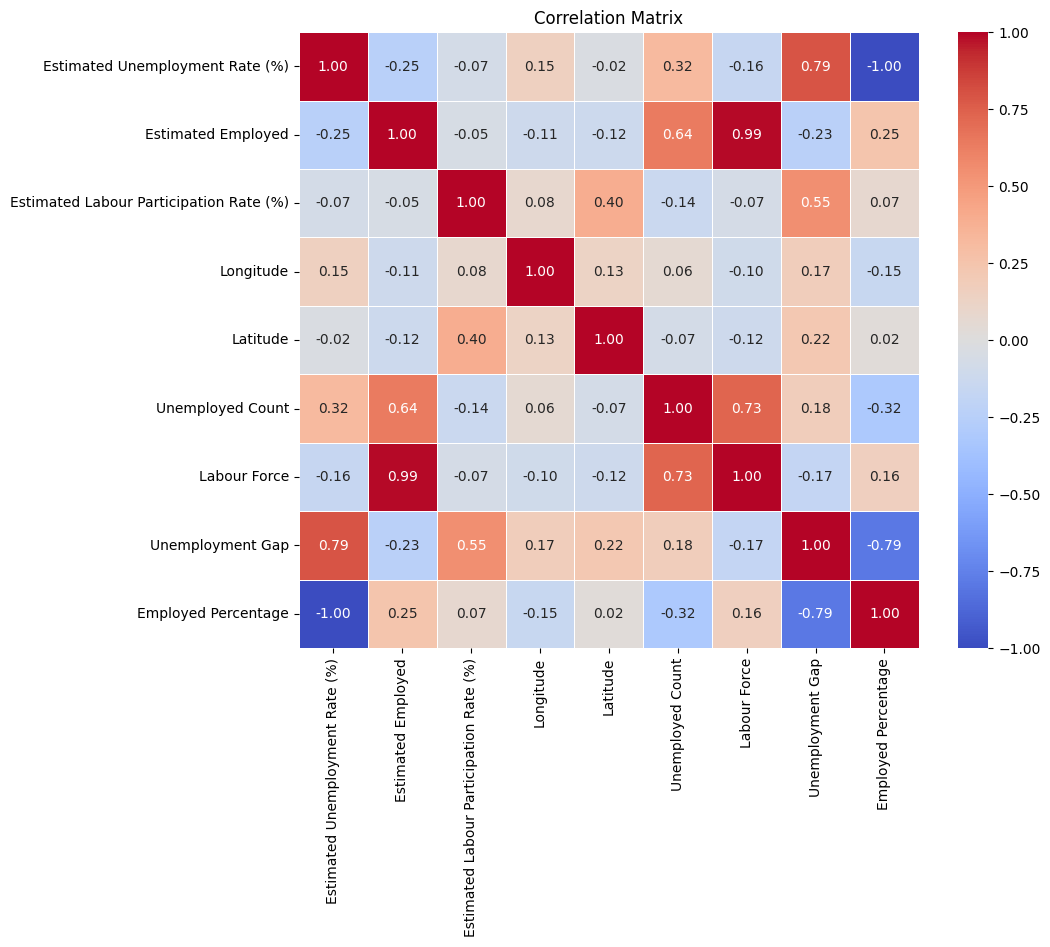

In [76]:
#correlation for only numerical columns
numerical_columns =df1.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df1[numerical_columns].corr()
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

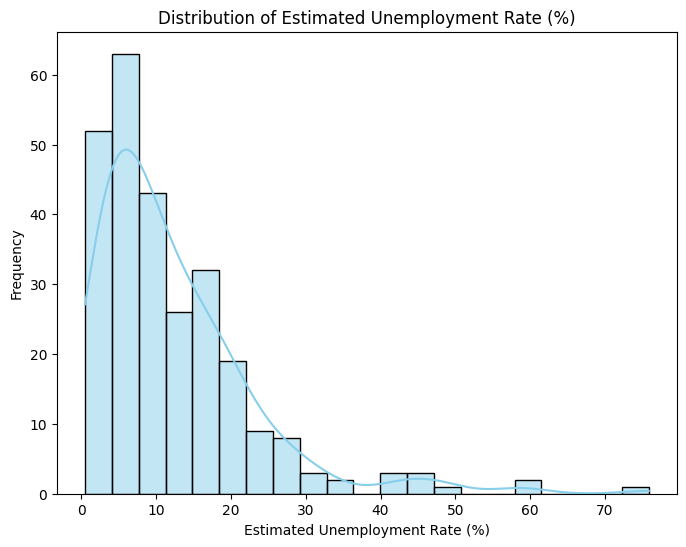

In [77]:
#distribution of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], kde=True, color='skyblue')
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

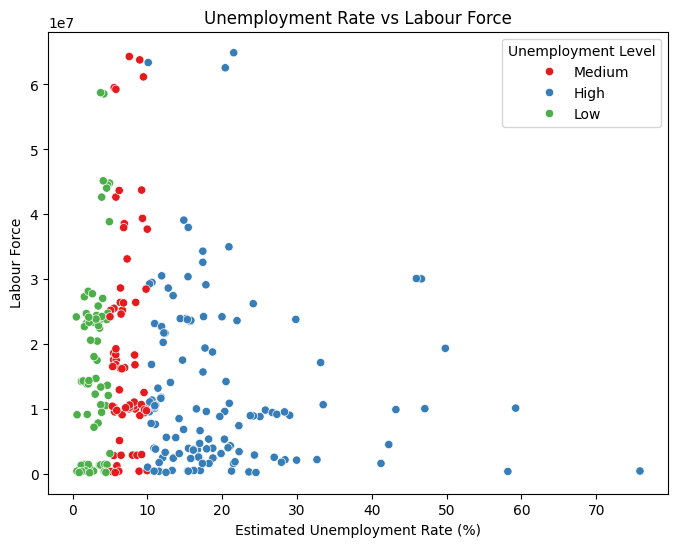

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Labour Force', data=df1, hue='Unemployment Level', palette='Set1')
plt.title('Unemployment Rate vs Labour Force')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Labour Force')
plt.show()


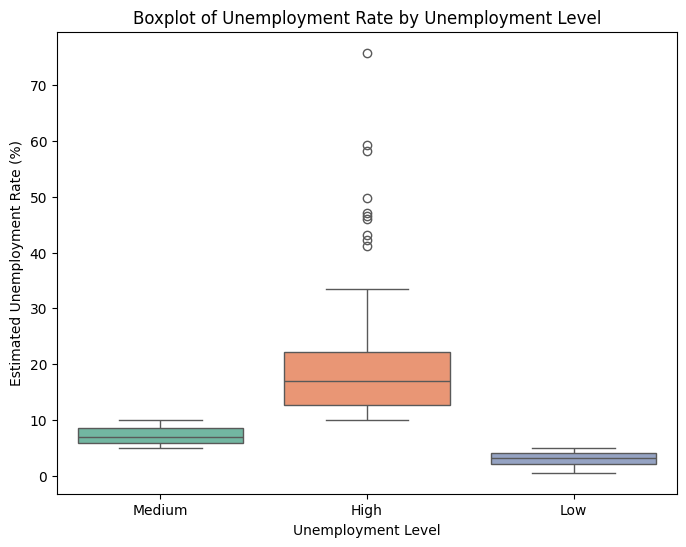

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Unemployment Level', y='Estimated Unemployment Rate (%)', data=df1, palette='Set2')
plt.title('Boxplot of Unemployment Rate by Unemployment Level')
plt.xlabel('Unemployment Level')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()


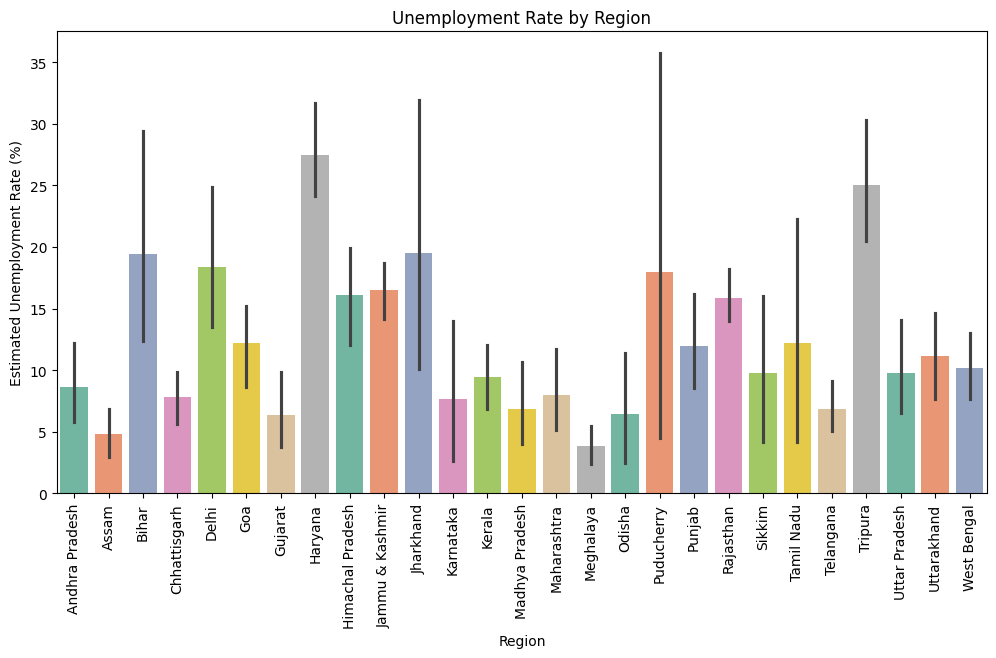

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1, palette='Set2')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
 7   Unemployed Count                         740 non-null    float64
 8   Labour Force                             740 non-null    float64
 9   Unemployment Gap                         740 non-null    float64
 10  Employed Percentage                      740 non-n

Performing Analysis on Dataframe 2

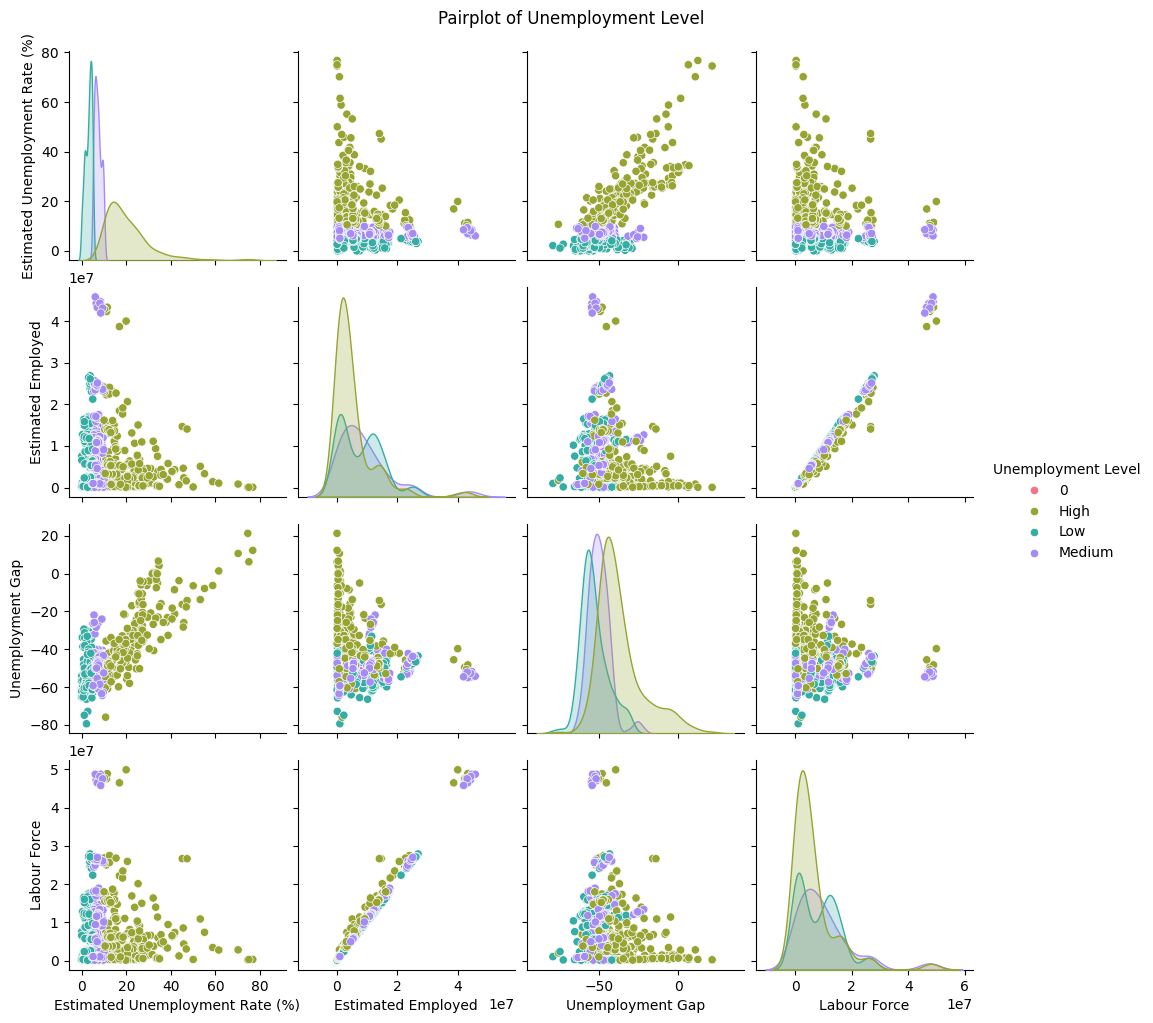

In [82]:
selected_columns = [
    "Estimated Unemployment Rate (%)", 
    "Estimated Employed", 
    "Unemployment Gap", 
    "Labour Force"
]
selected_df = df2[selected_columns + ['Unemployment Level']]
selected_df['Unemployment Level'] = selected_df['Unemployment Level'].astype('category')
sns.pairplot(selected_df, diag_kind="kde", hue="Unemployment Level", palette="husl")
plt.suptitle("Pairplot of Unemployment Level", y=1.02)
plt.show()


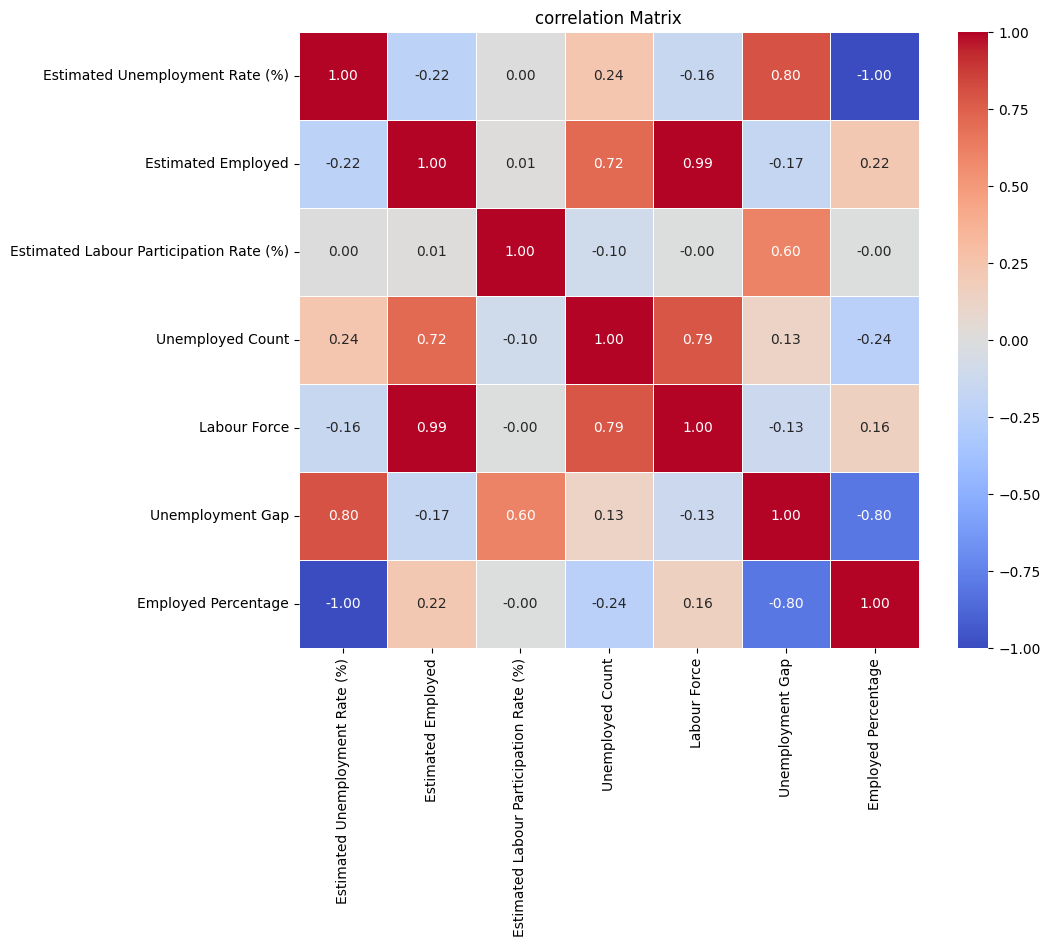

In [83]:
numerical_columns =df2.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot =True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("correlation Matrix")
plt.show()

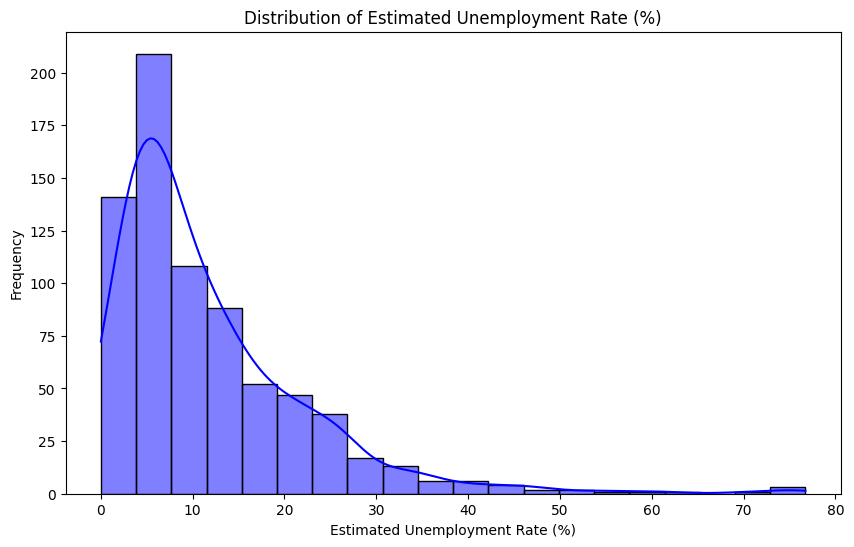

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Estimated Unemployment Rate (%)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


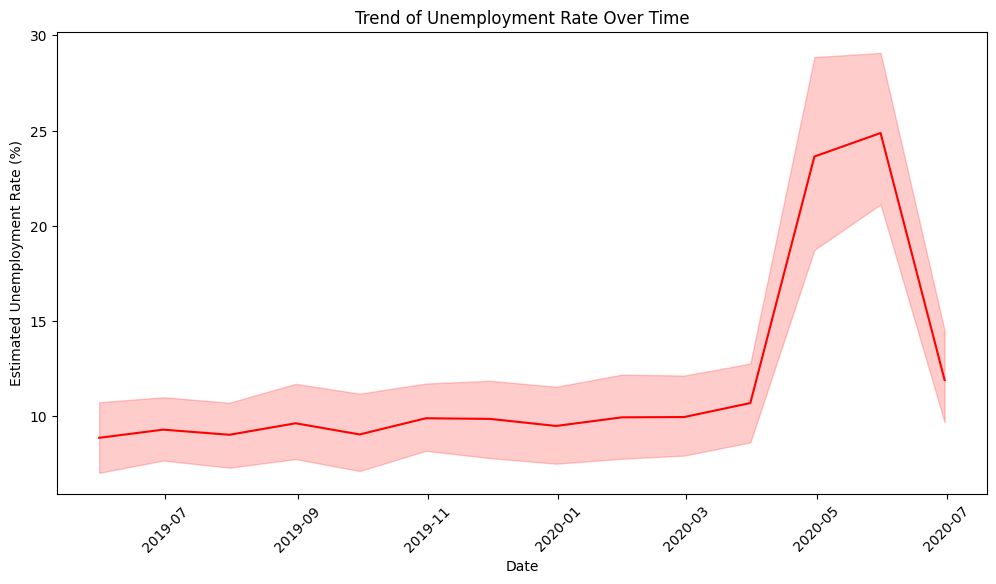

In [85]:
df2['Date'] = pd.to_datetime(df2['Date'])
# Plotting the time series of the unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df2, color='red')
plt.title('Trend of Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


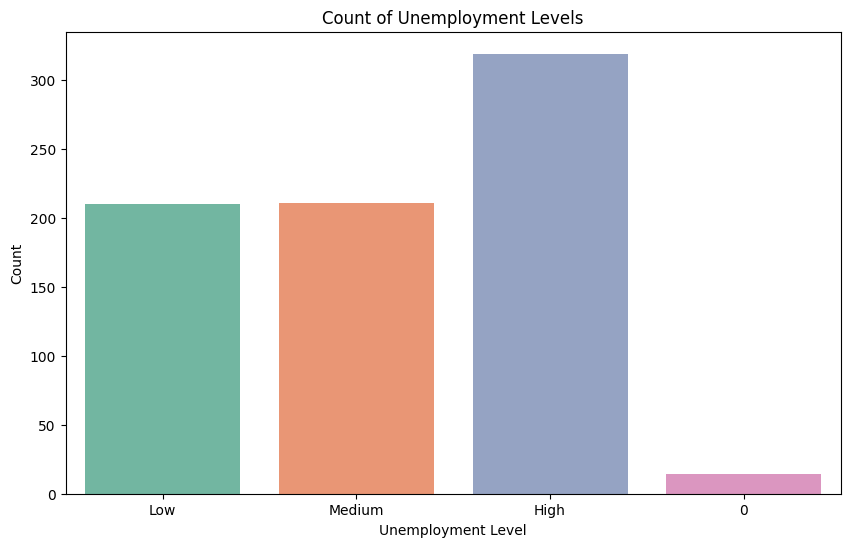

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Unemployment Level', data=df2, palette='Set2')
plt.title('Count of Unemployment Levels')
plt.xlabel('Unemployment Level')
plt.ylabel('Count')
plt.show()


In [87]:
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")


X shape: (267, 4)
Y shape: (267,)


In [88]:
X= df1[["Estimated Unemployment Rate (%)", 
    "Estimated Employed", 
    "Unemployment Gap", 
    "Labour Force"]]
Y= df1["Unemployment Level"]

In [89]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (213, 4)
Y_train shape: (213,)
X_test shape: (54, 4)
Y_test shape: (54,)


In [90]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the model
svm_model.fit(X_train, Y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Computing metrics
svm_accuracy = accuracy_score(Y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

print("SVM Classification Report:")
print(classification_report(Y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svm))


SVM Accuracy: 0.4444444444444444
SVM Classification Report:
              precision    recall  f1-score   support

        High       0.46      0.92      0.61        24
         Low       0.00      0.00      0.00        18
      Medium       0.33      0.17      0.22        12

    accuracy                           0.44        54
   macro avg       0.26      0.36      0.28        54
weighted avg       0.28      0.44      0.32        54

SVM Confusion Matrix:
[[22  0  2]
 [16  0  2]
 [10  0  2]]


In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing the AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Training the model
adaboost_model.fit(X_train, Y_train)

# Making predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Computing metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

adaboost_accuracy = accuracy_score(Y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", adaboost_accuracy)

print("AdaBoost Classification Report:")
print(classification_report(Y_test, y_pred_adaboost))

print("AdaBoost Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_adaboost))


AdaBoost Accuracy: 0.9629629629629629
AdaBoost Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98        24
         Low       1.00      0.94      0.97        18
      Medium       0.86      1.00      0.92        12

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

AdaBoost Confusion Matrix:
[[23  0  1]
 [ 0 17  1]
 [ 0  0 12]]


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Training the model
rf_model.fit(X_train, Y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Computing metrics
rf_accuracy = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print("Random Forest Classification Report:")
print(classification_report(Y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rf))


Random Forest Accuracy: 0.9629629629629629
Random Forest Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98        24
         Low       1.00      0.94      0.97        18
      Medium       0.86      1.00      0.92        12

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Random Forest Confusion Matrix:
[[23  0  1]
 [ 0 17  1]
 [ 0  0 12]]


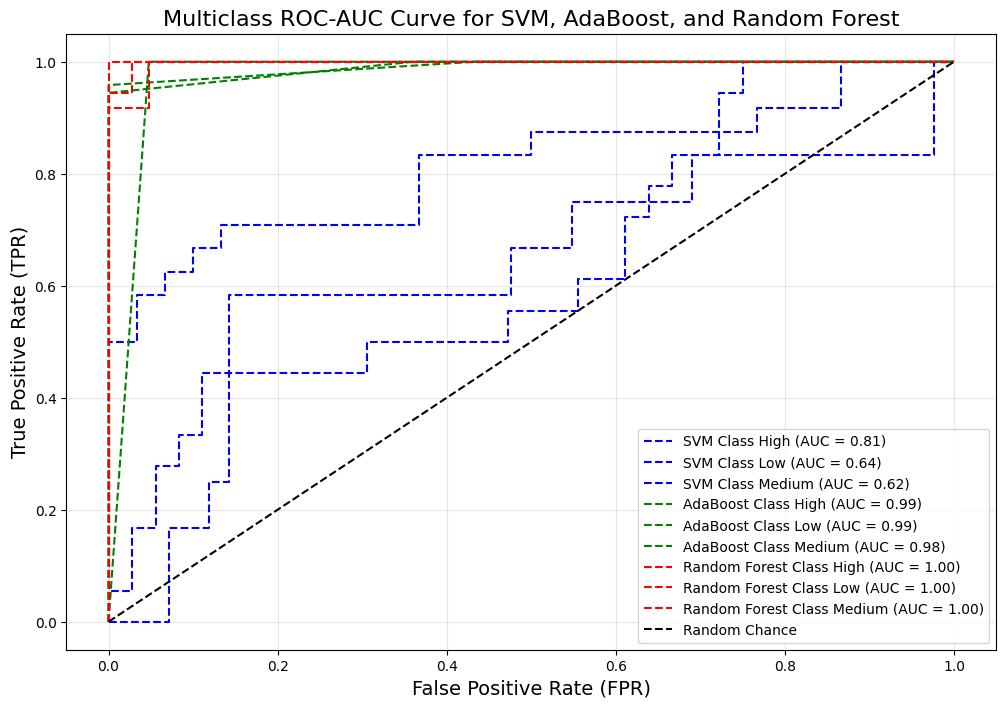

In [93]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(Y_test)
Y_test_binarized = label_binarize(Y_test, classes=classes)
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']
model_names = ['SVM', 'AdaBoost', 'Random Forest']
models = [svm_model, adaboost_model, rf_model]

for idx, model in enumerate(models):
    if hasattr(model, "decision_function"):
        probs = model.decision_function(X_test)
    else:
        probs = model.predict_proba(X_test)
    
    # Calculating ROC curve and AUC for each class
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, tpr, color=colors[idx], linestyle="--",
            label=f"{model_names[idx]} Class {class_label} (AUC = {roc_auc:.2f})"
        )
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

# Customizing the plot
plt.title("Multiclass ROC-AUC Curve for SVM, AdaBoost, and Random Forest", fontsize=16)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(Y_test)
Y_test_binarized = label_binarize(Y_test, classes=classes)
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']
model_names = ['SVM', 'AdaBoost', 'Random Forest']
models = [svm_model, adaboost_model, rf_model]

for idx, model in enumerate(models):
    if hasattr(model, "decision_function"):
        probs = model.decision_function(X_test)
    else:
        probs = model.predict_proba(X_test)
    
    # Calculating ROC curve and AUC for each class
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, tpr, color=colors[idx], linestyle="--",
            label=f"{model_names[idx]} Class {class_label} (AUC = {roc_auc:.2f})"
        )
    # Calculate macro and weighted AUC
    macro_auc = roc_auc_score(Y_test_binarized, probs, average='macro')
    weighted_auc = roc_auc_score(Y_test_binarized, probs, average='weighted')
    print(f"{model_names[idx]} Macro AUC: {macro_auc:.2f}")
    print(f"{model_names[idx]} Weighted AUC: {weighted_auc:.2f}")

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

# Customizing the plot
plt.title("Multiclass ROC-AUC Curve for SVM, AdaBoost, and Random Forest", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()
